In [1]:
import pandas as pd
import sklearn
from sklearn import svm,preprocessing
from sklearn.linear_model import LinearRegression



In [2]:
import pandas as pd 
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [3]:
df_loan= pd.read_csv(r"C:\Users\welcome\Desktop\Python csv file\New folder\data_file.csv")

In [4]:
df=df_loan.copy()

In [5]:
#Now we check the top 5 row the dataset
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
#Now we check the bottom 5 row the dataset
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [7]:
# check the sample dataset
df.sample(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
105915,105916,1,88183I70372,352.0,85.866667,85.866667,338.24,338.24,1.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-28
101329,101330,1,24268I82735,1112.0,3170.000000,3197.740000,733.46,968.06,4.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-31
11600,11601,1,03300I70373,517.0,11220.000000,11220.000000,14559.98,14559.98,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,45.666667,45.666667,UPW,2016-07-26
114126,114127,1,92216I82736,1854.0,1963.000000,1963.000000,249.91,249.91,0.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-20
36701,36702,1,50399I85320,1333.0,5179.000000,9239.710000,5107.49,8725.32,1.0,0.0,...,6.0,0.5,4.0,24,6,0.0,11.666667,15.600000,UPW,2016-08-13
60403,60404,1,85227I95202,307.0,1234.000000,5165.370000,16795.21,28426.37,30.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-12
6450,6451,1,34687I84456,142.0,126.193333,126.193333,1589.07,1589.07,5.0,0.0,...,6.0,0.0,3.0,18,6,0.0,2.000000,2.000000,UPW,2016-06-23
73058,73059,1,24248I90586,1058.0,781.291667,782.750000,145.00,150.00,4.0,0.0,...,6.0,0.0,5.0,30,6,0.0,4.250000,4.250000,UPW,2016-07-01
55682,55683,1,17477I85338,155.0,3309.856000,3337.760000,325.12,409.12,6.0,0.0,...,6.0,1.0,4.0,24,6,1.0,7.000000,6.666667,UPW,2016-07-12
26829,26830,1,99347I85320,86.0,5.758667,5.758667,1177.26,1177.26,2.0,0.0,...,6.0,1.0,1.0,6,6,1.0,0.000000,0.000000,UPW,2016-06-07


In [8]:
#Now check the data size row and coloum
df.shape

(209593, 37)

In [9]:
#Now check the basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [10]:
#now check the basic statices for all the colume
df.describe(include="all")

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,04581I85330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,60504.431823,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,52399.000000,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,104797.000000,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,157195.000000,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


In [11]:
df.min()

Unnamed: 0                        1
label                             0
msisdn                  00004I82738
aon                             -48
daily_decr30               -93.0127
daily_decr90               -93.0127
rental30                   -23737.1
rental90                   -24720.6
last_rech_date_ma               -29
last_rech_date_da               -29
last_rech_amt_ma                  0
cnt_ma_rech30                     0
fr_ma_rech30                      0
sumamnt_ma_rech30                 0
medianamnt_ma_rech30              0
medianmarechprebal30           -200
cnt_ma_rech90                     0
fr_ma_rech90                      0
sumamnt_ma_rech90                 0
medianamnt_ma_rech90              0
medianmarechprebal90           -200
cnt_da_rech30                     0
fr_da_rech30                      0
cnt_da_rech90                     0
fr_da_rech90                      0
cnt_loans30                       0
amnt_loans30                      0
maxamnt_loans30             

In [12]:
df[['aon',"daily_decr30",'daily_decr90']] = df[['aon',"daily_decr30",'daily_decr90']].abs()
df[['rental30',"rental90",'last_rech_date_ma']] = df[['rental30',"rental90",'last_rech_date_ma']].abs()
df[['last_rech_date_da',"medianmarechprebal90",'medianmarechprebal30']] = df[['last_rech_date_da',"medianmarechprebal90",'medianmarechprebal30']].abs()

In [13]:
#check null value
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [14]:
# check the coloum name
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

## EDA Process

In [15]:
#Change the datatype in the below coloume
df[["aon","last_rech_date_ma","last_rech_date_da"]]=df[["aon","last_rech_date_ma","last_rech_date_da"]].astype(int)
df[["fr_ma_rech30","cnt_ma_rech30","last_rech_date_da"]]=df[["fr_ma_rech30","cnt_ma_rech30","last_rech_date_da"]].astype(int)
df[["medianmarechprebal30","cnt_ma_rech90","fr_ma_rech90"]]=df[["medianmarechprebal30","cnt_ma_rech90","fr_ma_rech90"]].astype(int)
df[["medianamnt_ma_rech90","medianmarechprebal90","cnt_da_rech30"]]=df[["medianamnt_ma_rech90","medianmarechprebal90","cnt_da_rech30"]].astype(int)
df[["cnt_da_rech90","fr_da_rech30","cnt_da_rech90"]]=df[["cnt_da_rech90","fr_da_rech30","cnt_da_rech90"]].astype(int)
df[["fr_da_rech90","cnt_loans30","medianamnt_loans30"]]=df[["fr_da_rech90","cnt_loans30","medianamnt_loans30"]].astype(int)
df[["cnt_loans90","medianamnt_loans90","payback30","payback90"]]=df[["cnt_loans90","medianamnt_loans90","payback30","payback90"]].astype(int)


In [16]:
#check the changes of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  int32  
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  int32  
 9   last_rech_date_da     209593 non-null  int32  
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int32  
 12  fr_ma_rech30          209593 non-null  int32  
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [17]:
#Check the changes in the data set
df.shape,df_loan.shape

((209593, 37), (209593, 37))

In [18]:
# check the unique 
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4494
daily_decr30            146598
daily_decr90            158246
rental30                129745
rental90                138712
last_rech_date_ma         1154
last_rech_date_da         1161
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30      3163
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       573
medianmarechprebal90      2080
cnt_da_rech30             1064
fr_da_rech30              1071
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           4
cnt_loans90                982
amnt_loans90                69
maxamnt_loans90              3
medianam

In [19]:
# check the corelation
corr=df.corr()

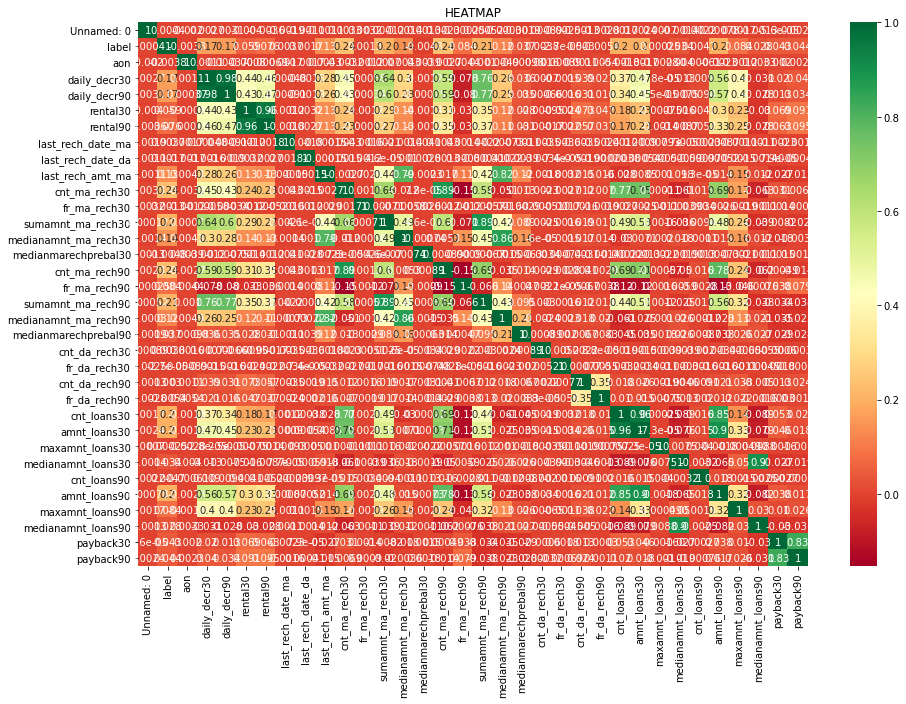

In [20]:
corr_feature=corr.index
plt.figure(figsize=(15,10))
sns.heatmap(df[corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.title("HEATMAP")
plt.show()

In [21]:
corr_matrix = df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168293
daily_decr90            0.166146
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120854
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.076033
rental30                0.058645
payback90               0.044201
payback30               0.043311
medianmarechprebal90    0.037015
medianamnt_loans30      0.034454
medianamnt_loans90      0.028422
cnt_loans90             0.004734
cnt_da_rech30           0.003827
last_rech_date_ma       0.003730
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

In [22]:
## Workin With date

In [23]:
df["pdate"]=pd.to_datetime(df.pdate)

In [24]:
# To add a new coloumn
df['Year']=df['pdate'].apply(lambda x:x.year)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['Day']=df['pdate'].apply(lambda x:x.day)

In [25]:
#check the changes in dataset
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Year,Month,Day
0,1,0,21408I70789,272,3055.050000,3065.150000,220.13,260.13,2,0,...,12,6,0,29,29,UPW,2016-07-20,2016,7,20
1,2,1,76462I70374,712,12122.000000,12124.750000,3691.26,3691.26,20,0,...,12,12,0,0,0,UPW,2016-08-10,2016,8,10
2,3,1,17943I70372,535,1398.000000,1398.000000,900.13,900.13,3,0,...,6,6,0,0,0,UPW,2016-08-19,2016,8,19
3,4,1,55773I70781,241,21.228000,21.228000,159.42,159.42,41,0,...,12,6,0,0,0,UPW,2016-06-06,2016,6,6
4,5,1,03813I82730,947,150.619333,150.619333,1098.90,1098.90,4,0,...,42,6,0,2,2,UPW,2016-06-22,2016,6,22


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'rental30'}>],
       [<AxesSubplot:title={'center':'rental90'}>,
        <AxesSubplot:title={'center':'last_rech_date_ma'}>,
        <AxesSubplot:title={'center':'last_rech_date_da'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'fr_ma_rech30'}>],
       [<AxesSubplot:title={'center':'sumamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rec

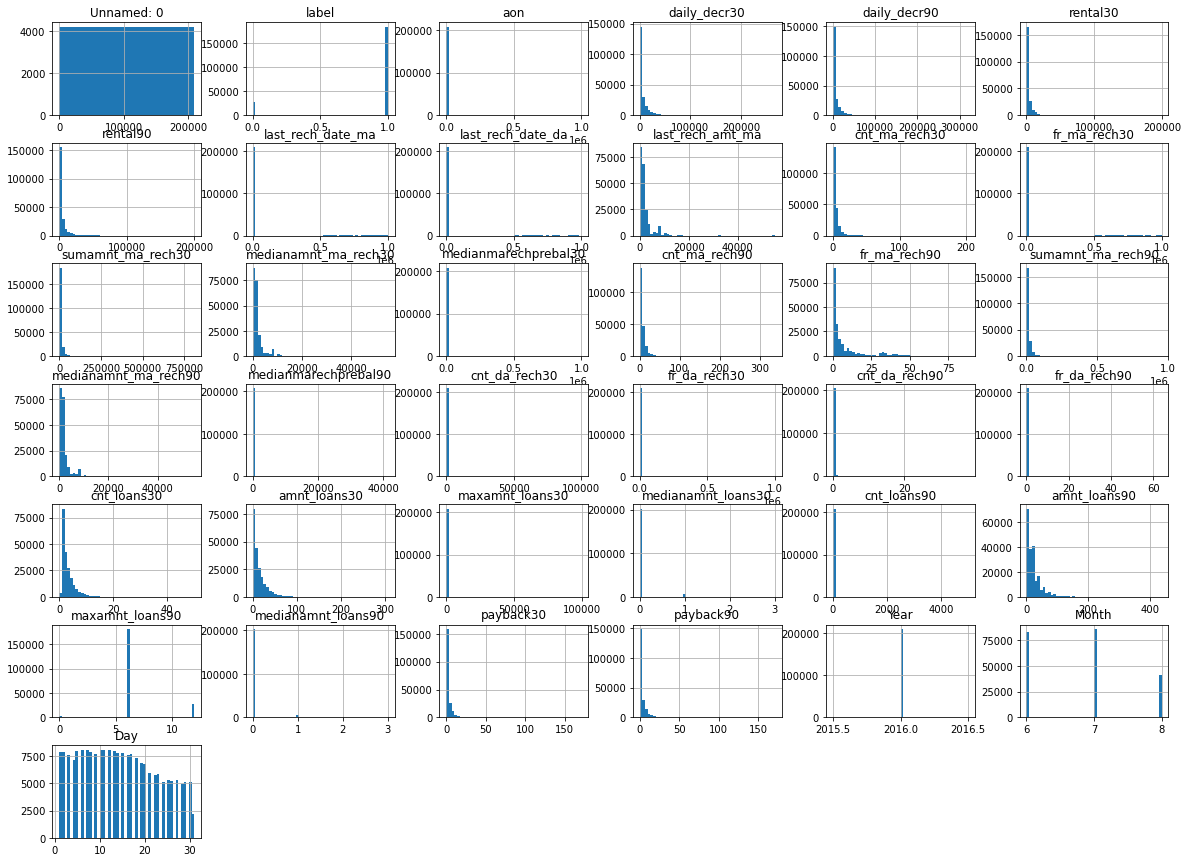

In [26]:
# # For plotting histogram
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))

<AxesSubplot:>

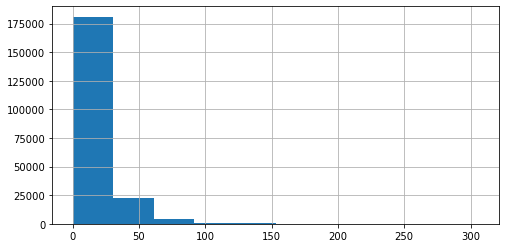

In [27]:
df["amnt_loans30"].hist(bins=10, figsize=(8, 4))

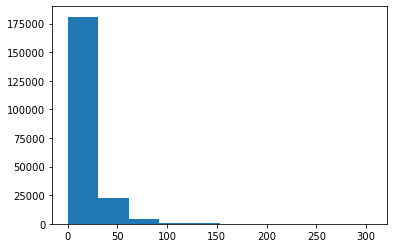

In [28]:
plt.hist(x= "amnt_loans30" , data = df )
plt.show()

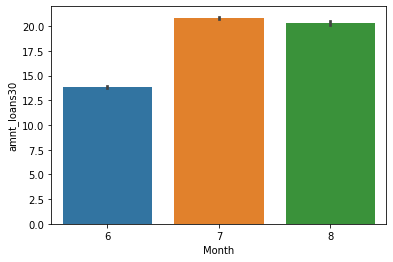

In [29]:
## lets check the what is the average size according to age
sns.barplot(y=df["amnt_loans30"], x=df["Month"], data=df)
plt.show()

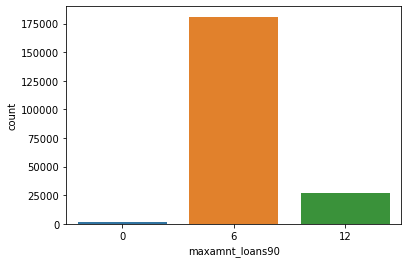

In [30]:

ax=sns.countplot(x="maxamnt_loans90",data=df)

In [31]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.00000
mean,104797.000000,0.875177,8112.803705,5381.431293,6082.544140,2715.376558,3509.497148,3756.123387,3712.202230,2064.452797,...,0.038341,18.518452,23.645398,6.703134,0.032511,3.232226,4.126517,2016.0,6.797321,14.39894
std,60504.431823,0.330519,75695.983713,9220.606472,10918.796572,4294.257439,5754.630600,53905.838843,53374.797717,2370.786034,...,0.202398,224.764898,26.469861,2.103864,0.185659,8.762775,10.256986,0.0,0.741435,8.43890
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,6.000000,1.00000
25%,52399.000000,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,2016.0,6.000000,7.00000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.000000,2016.0,7.000000,14.00000
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.000000,4.000000,2016.0,7.000000,21.00000
max,209593.000000,1.000000,999860.000000,265926.000000,320630.000000,198926.110000,200148.110000,998650.000000,999171.000000,55000.000000,...,3.000000,4997.000000,438.000000,12.000000,3.000000,171.000000,171.000000,2016.0,8.000000,31.00000


In [32]:
df.sort_values("aon",ascending = True).head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Year,Month,Day
134778,134779,1,77261I70789,1,1100.000000,1100.0,200.13,200.13,1,0,...,6,6,0,0,0,UPW,2016-07-26,2016,7,26
20543,20544,1,08706I89230,1,824.720000,831.2,6962.88,7788.27,1,0,...,6,6,0,156,156,UPW,2016-07-27,2016,7,27
158303,158304,1,20732I89237,1,350.000000,350.0,4917.34,5578.92,1,0,...,6,6,0,0,0,UPW,2016-07-19,2016,7,19
179386,179387,1,09070I88649,1,200.000000,200.0,24998.70,27899.58,1,0,...,6,6,1,0,0,UPW,2016-07-24,2016,7,24
26502,26503,0,15176I90844,1,650.000000,650.0,99.56,99.56,1,0,...,6,6,0,0,0,UPW,2016-07-19,2016,7,19
165601,165602,1,98936I85350,1,400.000000,400.0,99.56,99.56,1,0,...,6,6,0,0,0,UPW,2016-07-24,2016,7,24
34822,34823,1,80379I84450,1,234.000000,234.0,1816.93,2577.68,1,0,...,6,6,0,0,0,UPW,2016-07-25,2016,7,25
113095,113096,1,59291I89234,1,9970.233333,9977.0,17962.59,19756.82,1,0,...,6,6,0,0,0,UPW,2016-07-29,2016,7,29
23652,23653,1,91325I82739,1,1247.933333,1253.0,5807.38,7231.81,1,0,...,6,6,0,0,0,UPW,2016-07-19,2016,7,19
194884,194885,1,75090I70373,1,1500.000000,1500.0,193.12,193.12,0,0,...,6,6,0,0,0,UPW,2016-07-18,2016,7,18


In [33]:
df.min()

Unnamed: 0                                1
label                                     0
msisdn                          00004I82738
aon                                       1
daily_decr30                              0
daily_decr90                              0
rental30                                  0
rental90                                  0
last_rech_date_ma                         0
last_rech_date_da                         0
last_rech_amt_ma                          0
cnt_ma_rech30                             0
fr_ma_rech30                              0
sumamnt_ma_rech30                         0
medianamnt_ma_rech30                      0
medianmarechprebal30                      0
cnt_ma_rech90                             0
fr_ma_rech90                              0
sumamnt_ma_rech90                         0
medianamnt_ma_rech90                      0
medianmarechprebal90                      0
cnt_da_rech30                             0
fr_da_rech30                    

## 

In [34]:
#lets hcek skewnesss of the dataset
df.skew()
#Below shows acceptable level of skewness (-.55 to +.55 )

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392952
daily_decr30             3.946246
daily_decr90             4.252578
rental30                 4.560510
rental90                 4.467282
last_rech_date_ma       14.790975
last_rech_date_da       14.814858
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772834
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779883
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752764
medianmarechprebal90    45.089668
cnt_da_rech30           17.818410
fr_da_rech30            14.776431
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       5.540859
cnt_loans90             16.595040
amnt_loans90  

In [35]:
df.drop(['Unnamed: 0', 'msisdn','pdate', 'pcircle'],axis= 1, inplace= True)

In [36]:
import numpy as np
for x in df.columns:
    if df.skew().loc[x]>0.55:
        df[x]=np.log1p(df[x])

In [37]:
X = df.drop(labels=['label'], axis=1)
y = df['label']
X.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Year,Month,Day
0,5.609472,8.024879,8.028178,5.398751,5.565018,1.098612,0.0,7.339538,1.098612,3.091042,...,0.0,1.098612,2.564949,1.945910,0.0,3.401197,3.401197,2016,7,20
1,6.569481,9.402860,9.403087,8.213994,8.213994,3.044522,0.0,8.663542,0.693147,0.000000,...,0.0,0.693147,2.564949,2.564949,0.0,0.000000,0.000000,2016,8,10
2,6.284134,7.243513,7.243513,6.803650,6.803650,1.386294,0.0,7.339538,0.693147,0.000000,...,0.0,0.693147,1.945910,1.945910,0.0,0.000000,0.000000,2016,8,19
3,5.488938,3.101353,3.101353,5.077795,5.077795,3.737670,0.0,6.854355,0.000000,0.000000,...,0.0,1.098612,2.564949,1.945910,0.0,0.000000,0.000000,2016,6,6
4,6.854355,5.021373,5.021373,7.002975,7.002975,1.609438,0.0,7.745003,2.079442,1.098612,...,0.0,2.079442,3.761200,1.945910,0.0,1.098612,1.098612,2016,6,22


KNN score: 0.8856848413137656

KNN score: 0.8627263879081661

KNN score: 0.9052081146586767

KNN score: 0.9002461879043493

KNN score: 0.9115441134372794

KNN score: 0.9080516803755797

KNN score: 0.9128991011278841

KNN score: 0.9111624267638695

KNN score: 0.914063245481784

KNN score: 0.9128418481268726

KNN score: 0.9139296551460906

KNN score: 0.9137006431420447

KNN score: 0.9153418958377069

KNN score: 0.915112883833661

KNN score: 0.9159907631825035

KNN score: 0.9158380885131395

KNN score: 0.9162579438538904

KNN score: 0.9163915341895837

KNN score: 0.9166587148609706

KNN score: 0.9164678715242657

KNN score: 0.9166587148609706

KNN score: 0.9167923051966641

KNN score: 0.9166014618599592

KNN score: 0.9162579438538904



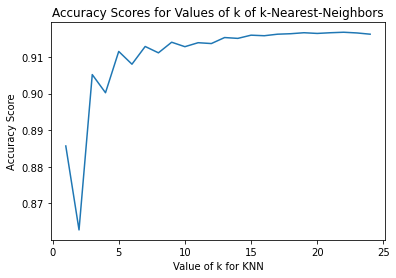

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

all_accuracies = []


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = list(range(1,25))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k) # Choose classifier
    KNN_fit = knn.fit(X_train_scaled, y_train) # Train classifier
    accuracy = KNN_fit.score(X_test_scaled, y_test) # Estimate the accuracy of the classifier on future data
    print ('KNN score: {}\n'.format(accuracy))
    scores.append(accuracy)
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

all_accuracies.append(max(scores))

In [ ]:
from sklearn.svm import SVC

# For unnormalized data
SVM1_RBF_UnNorm = SVC(C=10).fit(X_train, y_train)
SVM1_Sig_UnNorm = SVC(C=10, kernel="sigmoid").fit(X_train, y_train)

# For normalized data
SVM1_RBF_Norm = SVC(C=10).fit(X_train_scaled, y_train)
SVM1_Sig_Norm = SVC(C=10, kernel="sigmoid").fit(X_train_scaled, y_train)

print('Accuracy of SVM on unnormalized data with C=10 and kernel function RBF: \nOn training set:{0:.3f}'.format(SVM1_RBF_UnNorm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_RBF_UnNorm.score(X_test_scaled, y_test)))
print('Accuracy of SVM on unnormalized data with C=10 and kernel function Sigmoid: \nOn training set:{0:.3f}'.format(SVM1_Sig_UnNorm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_Sig_UnNorm.score(X_test_scaled, y_test)))
print('Accuracy of SVM on normalized data with C=10 and kernel function RBF: \nOn training set:{0:.3f}'.format(SVM1_RBF_Norm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_RBF_Norm.score(X_test_scaled, y_test)))
print('Accuracy of SVM on normalized data with C=10 and kernel function Sigmoid: \nOn training set:{0:.3f}'.format(SVM1_Sig_Norm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_Sig_Norm.score(X_test_scaled, y_test)))

all_accuracies.append(SVM1_RBF_Norm.score(X_test_scaled, y_test))

In [ ]:
import lightgbm as lg

lg = lg.LGBMClassifier()
lg.fit(X_train_scaled,y_train)
predictions = lg.predict(X_test_scaled)
lg_acc = (predictions == y_test).sum().astype(float)/len(predictions)
print("Accuracy of LightGBM Classifier: ",lg_acc)

all_accuracies.append(lg_acc)

In [ ]:
##  let's try with a Decision Tree algorithm:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

DTC = DecisionTreeClassifier(max_depth=None).fit(X_train_scaled, y_train)
y_predicted = DTC.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predicted)
print("Classification with Decision Tree Algorithm\nConfusion Matrix\n\n",conf_mat)
print('\nAccuracy:{0:.3f}\n'.format(accuracy_score(y_test, y_predicted)))
print('Classification Report: \n\n',classification_report(y_test, y_predicted))

all_accuracies.append(accuracy_score(y_test, y_predicted))